# Exercise "Lecture 8: Regression"

In this set of exercises, we will use regression to predict a baseball player's batting average based on previous results. 

The exercises cover the following points:
* Storing the data into an pandas dataframe (Exercise 1)
* Inspecting the data (Exercise 2-7)
* Creating Train and Test data (Exercise 8)
* Learning a Linear Regression model from the data (Exercise 9-11)
* Inspecting the predictions of that model (Exercise 12-17)
* Multiple Linear Regression: Adding features and observing the changes in predictions (PROVIDED)

_**Useful Cheat sheets**_
* pandas_cheat_sheet.ipynb
* linear_regression_cheat_sheet.ipynb
* stats_and_visu.ipynb

### Storing the data into a dataframe

**Exercise 1:** Create a pandas dataframe containing the  data

* Download the data file "baseball.csv" from Arche and store it in a data directory placed where your current Jupyter notebook is
* Use the pandas.read_csv  method to create the dataframe. 
* How many rows and columns ? Use  the pandas [df.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) attribute to inspect the dataframe you just created

**Help:** pandas_cheat_sheet.ipynb

In [3]:
import pandas as pd
df = pd.read_csv("baseball.csv", sep="\t")
df.shape

(588, 6)

### Inspecting the data 

**Exercise 2:** Print out the headers

In [5]:
df.head()

,YEAR,NAMElast,NAMEfirst,BattingAverage,BattingAverageLAG1,CumulativeAverageLAG1
0,1960,Aaron,Hank,0.292,0.355,0.355
1,1961,Aaron,Hank,0.327,0.292,0.324
2,1962,Aaron,Hank,0.323,0.327,0.325
3,1963,Aaron,Hank,0.319,0.323,0.324
4,1964,Aaron,Hank,0.328,0.319,0.323


**Exercise 3:** Print out the first 5 rows

In [6]:
df[:5]

,YEAR,NAMElast,NAMEfirst,BattingAverage,BattingAverageLAG1,CumulativeAverageLAG1
0,1960,Aaron,Hank,0.292,0.355,0.355
1,1961,Aaron,Hank,0.327,0.292,0.324
2,1962,Aaron,Hank,0.323,0.327,0.325
3,1963,Aaron,Hank,0.319,0.323,0.324
4,1964,Aaron,Hank,0.328,0.319,0.323


**Exercise 4:** Use pandas describe() method to get basic summary statistics for each of the columns.

In [7]:
df.describe()

,YEAR,BattingAverage,BattingAverageLAG1,CumulativeAverageLAG1
count,588.000000,588.000000,588.000000,588.000000
mean,1982.372449,0.277202,0.279194,0.275794
std,13.813520,0.031114,0.029996,0.024000
min,1960.000000,0.185000,0.185000,0.198000
25%,1970.000000,0.256000,0.259000,0.259000
50%,1983.000000,0.277000,0.280000,0.274000
75%,1996.000000,0.298000,0.300000,0.291000
max,2004.000000,0.390000,0.368000,0.357000


**Exercise 5:** Using scatter plots to explore correlation

Create two scatter plots:

* One scatter plot showing the relation between BattingAverage and BattingAverageLAG1
* One scatter plot showing the relation between BattingAverage and CumulativeAverageLAG1

What kind of relationship do you see? e.g. positive, negative? linear? non-linear?   
_**Hint:**_ 
Use matplotlib scatter, xlabel, ylabel ant title methods to create the plots (cf. stats_and_visu_cheat_sheet.ipynb)

Text(0.5, 1.0, 'relation between BattingAverageLAG1 and BattingAverage')

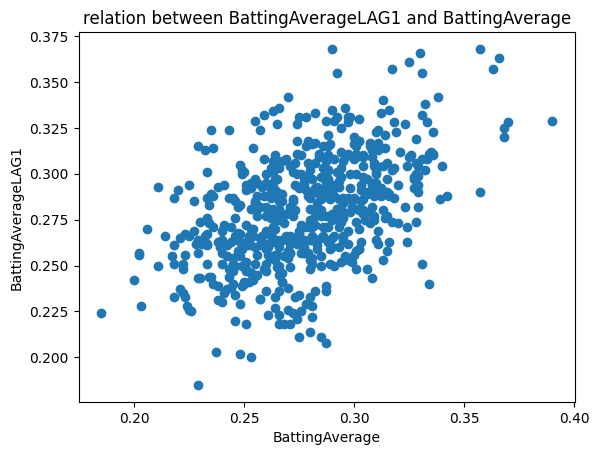

In [9]:
from matplotlib import pyplot as plt
plt.scatter(x = df["BattingAverage"], y = df["BattingAverageLAG1"])
plt.xlabel("BattingAverage")
plt.ylabel("BattingAverageLAG1")
plt.title("relation between BattingAverageLAG1 and BattingAverage")

Text(0.5, 1.0, 'relation between CumulativeAverageLAG1 and BattingAverage')

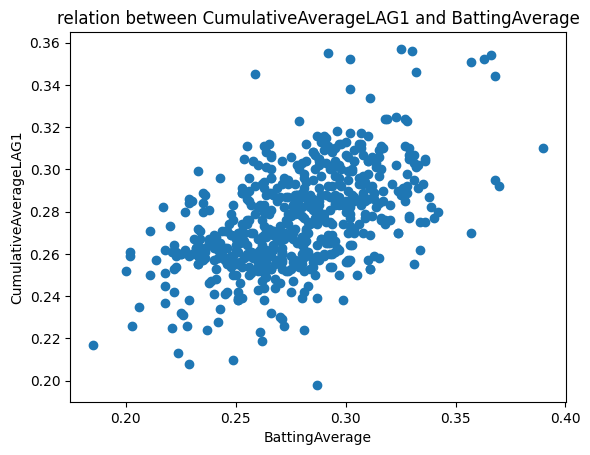

In [10]:
plt.scatter(x = df["BattingAverage"], y = df["CumulativeAverageLAG1"])
plt.xlabel("BattingAverage")
plt.ylabel("CumulativeAverageLAG1")
plt.title("relation between CumulativeAverageLAG1 and BattingAverage")

**Exercise 6:** Examining Correlations between features

* Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr) method to compute correlation between features (use pearson's r metrics)   
Which feature is most strongly correlated with Batting Avg Scores ?

In [11]:
df[["BattingAverage", "BattingAverageLAG1"]].corr(method="pearson")

,BattingAverage,BattingAverageLAG1
BattingAverage,1.0000,0.4807
BattingAverageLAG1,0.4807,1.0000


In [12]:
df[["BattingAverage", "CumulativeAverageLAG1"]].corr(method="pearson")

,BattingAverage,CumulativeAverageLAG1
BattingAverage,1.000000,0.538349
CumulativeAverageLAG1,0.538349,1.000000


CumulativeAverageLAG1 is more strongly correlated with BattingAverage than BattingAverageLAG1.

**Exercise 7**

* Use matplolib hist method to display the histogram of Batting average scores   
Is the distribution normal or skewed ?

(array([  5.,  22.,  68., 135., 140., 118.,  68.,  24.,   6.,   2.]),
 array([0.185 , 0.2055, 0.226 , 0.2465, 0.267 , 0.2875, 0.308 , 0.3285,
        0.349 , 0.3695, 0.39  ]),
 <BarContainer object of 10 artists>)

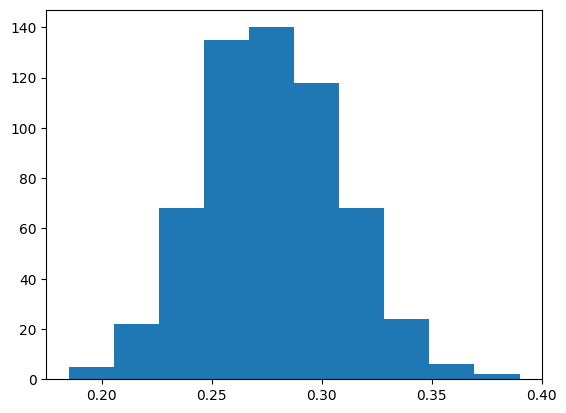

In [13]:
plt.hist(df["BattingAverage"])

### Creating Training and Test Data

$Y$ = batting average score  (the dependent variable)   
$X$ = all the other features (the independent variable)

We use $X$ and $Y$ to learn a linear regression model and predict batting average scores. 

**Exercise 8:** Creating train and test data

* Create two new dataframes, one called X from the BattingAverageLAG1 column and the other called Y from the BattingAverage column.
* Reshape X to a list of lists using e.g., X.values.reshape(-1, 1).  
When using a single feature for regression, you need to reshape your array as shown, else it will be rejected by 
the linear regression model. 

_**Cf. regression CS for an example.**_

* Split the data into training and testing subsets.   
Remember that the data must first be shuffled into a random order to remove any bias in the ordering of the dataset. An easy way to ensure this shuffling is to use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn.model_selection

### Training and Testing a Linear Regression Model

_**Cf. regression_cheat_sheet.ipynb**_ 

**Exercise 9:**  Create a LinearRegression object
Use sklearn [LinearRegression()](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) method 

**Exercise 10:** Fit the model

* The fit() function estimates the coefficients the linear regression using least squares.
* It learns a model

**Exercise 11:** Compute the predictions

* on the training data
* on the test data

### Inspecting the model predictions

How well does the model fit the test data ? (PROVIDED: adapt it to the variable names you used)  

* Create a scatter plot representing the test data: X are the input features and Y are the observed values. 
* Overlay it with a plot representing the model predictions:  X are the input features and Y are the values predicted for X by the model.     
The closer the datapoints are to the blue line, the most accurate the model predictions are. 

In [ ]:
# Visualising the Test set results 

plt.scatter(X_test, Y_test, color = 'red') 
plt.plot(X_test, lm.predict(X_test), color = 'blue') 
plt.title('BattingAverageLAG1 vs BattingAverage (Test set)') 
plt.xlabel('BattingAverageLAG1') 
plt.ylabel('BattingAverage') 
plt.show()

**Exercise 12:** Compute the mean squared error for both predictions.   
Use the mean_squared_error method from sklearn.metrics 

**Exercise 13:** Print out the model score ($R^2$)

* lm.score is the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
* a statistical measure of how well the regression predictions approximate the real data points
* An $R^2$ of 1 indicates that the regression predictions perfectly fit the data.

**Exercise 14:** Inspect the feature weights

* lm.coef_ = array of estimated coefficients
* Use pandas DatFrame.from_items to create a dataframe whose columns are the features (X.columns) and the model coefficients (lm.coef_ )

**Exercise 15:** Compare predicted and expected scores

**Exercise 16:** Display the histogram of predicted scores

* Use plt.hist method

**Exercise 17:** Plot the histograms of the true scores compared to the predicted scores (side by side)

### Multiple Linear Regression (PROVIDED)
#### Using both features


In [ ]:
# Get the features values (X) and the target values (Y)
X = baseball_df[["BattingAverageLAG1","CumulativeAverageLAG1"]]
Y = baseball_df["BattingAverage"]

#### Training a new model 

Retrain to take into account the new features

In [ ]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, 
                                                     test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

#### Inspecting the results

Inspect the feature weight

In [ ]:
L = {'Features':X_train.columns,'Coefficients':lm.coef_}
pd.DataFrame(L)

Compute the mean squared error

In [ ]:
print("MSE on Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("MSE on X_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Compute the score (coefficient of determination)

In [ ]:
print(lm.score(X_train,Y_train))
print(lm.score(X_test,Y_test))